In [13]:
import pandas as pd
import numpy as np
import scipy.stats
import math
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
###set file for imports
t='_d2_v2'

In [20]:
##### import GAMS results
#########ra characteristics

hhtrn0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/hhtrn0_d_rpt.csv'%t)
del hhtrn0_d_rpt['file']
hhtrn0_d_rpt=hhtrn0_d_rpt.groupby(['r','h','sk'],as_index=False).sum()

#savings
sav0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/sav0_d_rpt.csv'%t)
del sav0_d_rpt['file']

#labor tax rate
tl0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/tl0_d_rpt.csv'%t)
del tl0_d_rpt['file']

#updated capital endowment
ke0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/ke0_d_rpt.csv'%t)
del ke0_d_rpt['file']

##############################################################################
##############################################################################

#initial labor endowment
le0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/le0_d_rpt.csv'%t)
del le0_d_rpt['file']

#new labor endowment
le0_d_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/le0_d_rpt0.csv'%t)
del le0_d_rpt0['file']

#cons0_rpt(r,h,sk)=c0_h_d(r,h,sk);
cons0_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/cons0_rpt.csv'%t)
del cons0_rpt['file']

# #new welfare
# w_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/w_rpt1.csv'%t)
# del w_rpt0['file']

##wages
pl_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/pl_rpt1.csv'%t)
del pl_rpt0['file']

###consumer price index
pc_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/pc_rpt1.csv'%t)
del pc_rpt0['file']

###rental rate of capital
rk_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/rk_rpt1.csv'%t)
del rk_rpt0['file']

####cons demand benchmark
cd0_h_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/cd0_h_d_rpt.csv'%t)
del cd0_h_d_rpt['file']

####sector labor demand by skill
ld0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/ld0_d_rpt.csv'%t)
# del ld0_d_rpt['file']

####output changes by sector 
y_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/y_rpt1.csv'%t)
del y_rpt0['file']

####imports 

# a_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/a_rpt1.csv'%t)
# del a_rpt0['file']

ys0_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/ys0_rpt.csv'%t)
del ys0_rpt['file']

####output changes by sector 
py_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/py_rpt1.csv'%t)
del py_rpt0['file']

####price of capital 
pk_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/pk_rpt1.csv'%t)
del pk_rpt0['file']

####foreign exchange price
pfx_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/pfx_rpt1.csv'%t)
del pfx_rpt0['file']

####foreign exchange price
pn_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/pn_rpt1.csv'%t)
del pn_rpt0['file']

####ra after shock
ra_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/ra_rpt1.csv'%t)
del ra_rpt0['file']

####consumption after shock
c_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/c_rpt1.csv'%t)
del c_rpt0['file']


kd0_rpt= pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/kd0_rpt.csv'%t)
del kd0_rpt['file']

###intermediate goods demand

id0_rpt= pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/id0_rpt.csv'%t)
del id0_rpt['file']

# ###INITIAL LABOR SUPPLY
# labor_b=pd.read_csv('/Users/hannahkamen/Downloads/csv%s/le0_d_rpt00.csv'%t)
# labor_b=labor_b[['file','region','household','benchmark_le0','skill']].reset_index()
# labor_b=labor_b.rename(columns={'file':'r','region':'q','skill':'sk','household':'h'})
# del labor_b['index']


shares=pd.read_csv('/Users/hannahkamen/Downloads/le0_shr2.csv')

shares_u=shares.drop_duplicates(subset=['q','h','sk']).pivot(index=['q','h'],columns='sk',values='skill_shr').reset_index()
shares_u['diff']=shares_u['skl']-shares_u['unskl']


shocks=pd.read_csv('/Users/hannahkamen/Downloads/le0_shock0_v2_test2_adj.csv')
shocks=shocks.rename(columns={'skill_shr':'pct_shock'})

shocks_lm=shocks[(shocks['r']==shocks['q'])]



Text(0, 0.5, 'Pct Change')

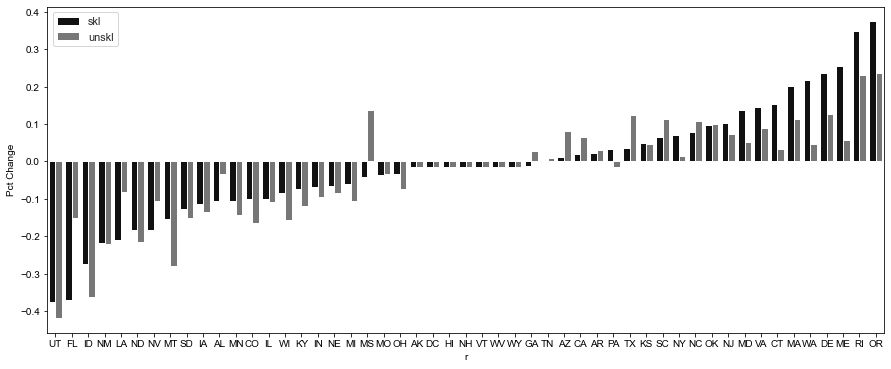

In [21]:
####plot labor endowment changes
fig, ax = plt.subplots(1, 1,figsize=(15,6))
shocks_lm=shocks_lm.sort_values(by=['sk','pct_shock'],ascending=True).reset_index()

sns.set_theme(style="whitegrid")
g = sns.barplot(
    data=shocks_lm,
    x="r", y='pct_shock',hue='sk',
   palette=['#111111','#777777']
)
plt.legend(loc='upper left')
plt.ylabel("Pct Change")
#g.legend.set_title("")

In [22]:
#### make bar chart showing total wage changes

Text(0, 0.5, 'Pct Change Nominal Wage')

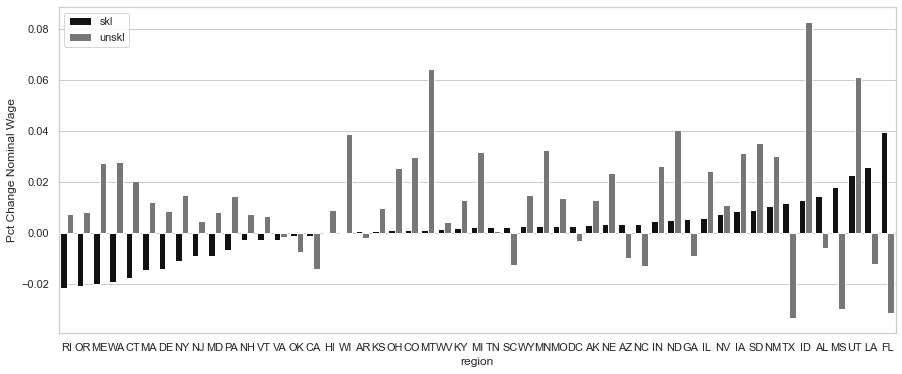

In [23]:
pl_rpt0['pl_diff']=pl_rpt0['pl_shock0']-1

fig, ax = plt.subplots(1, 1,figsize=(15,6))
pl_rpt0=pl_rpt0.sort_values(by=['skill','pl_diff'],ascending=True).reset_index()

sns.set_theme(style="whitegrid")
g = sns.barplot(
    data=pl_rpt0,
    x="region", y='pl_diff',hue='skill',
   palette=['#111111','#777777']
)

plt.legend(loc='upper left')
plt.ylabel("Pct Change Nominal Wage")
#g.legend.set_title("")

In [24]:
labor_wage=shocks_lm.drop_duplicates(subset=['r','sk']).merge(pl_rpt0,left_on=['r','sk'],right_on=['region','skill'],how='inner')
labor_wage['wage_diff']=labor_wage['pl_shock0']-1
limit_states=['HI','WY','VT','AK','TN','DC','NH','WV']
labor_wage=labor_wage[~(labor_wage['region'].isin(limit_states))]
labor_wage_skl=labor_wage[(labor_wage['skill']=='skl') ]
labor_wage_unskl=labor_wage[(labor_wage['skill']=='unskl') & (~labor_wage['pct_shock'].isin(limit_states))]


# shocks_lm=shocks_lm.sort_values(by=['sk','pct_shock'],ascending=True).drop_duplicates(subset=['r','sk'])
labor_wage_pvt=labor_wage.pivot_table(index='r',columns='sk',values=['pct_shock','wage_diff'])
labor_wage_pvt.columns = ["_".join((j,k)) for j,k in labor_wage_pvt.columns]
labor_wage_pvt=labor_wage_pvt.reset_index()
labor_wage_pvt['difference']=labor_wage_pvt['pct_shock_skl']-labor_wage_pvt['pct_shock_unskl']

labor_wage_pvt['abs_skl_shock']=abs(labor_wage_pvt['pct_shock_skl'])
labor_wage_pvt['abs_unskl_shock']=abs(labor_wage_pvt['pct_shock_unskl'])


# shocks_lm=shocks_lm.sort_values(by=['sk','pct_shock'],ascending=True).drop_duplicates(subset=['r','sk'])
labor_wage_pvt=labor_wage.pivot_table(index='r',columns='sk',values=['pct_shock','wage_diff'])
labor_wage_pvt.columns = ["_".join((j,k)) for j,k in labor_wage_pvt.columns]
labor_wage_pvt=labor_wage_pvt.reset_index()
labor_wage_pvt['difference']=labor_wage_pvt['pct_shock_skl']-labor_wage_pvt['pct_shock_unskl']

labor_wage_pvt['abs_skl_shock']=abs(labor_wage_pvt['pct_shock_skl'])
labor_wage_pvt['abs_unskl_shock']=abs(labor_wage_pvt['pct_shock_unskl'])


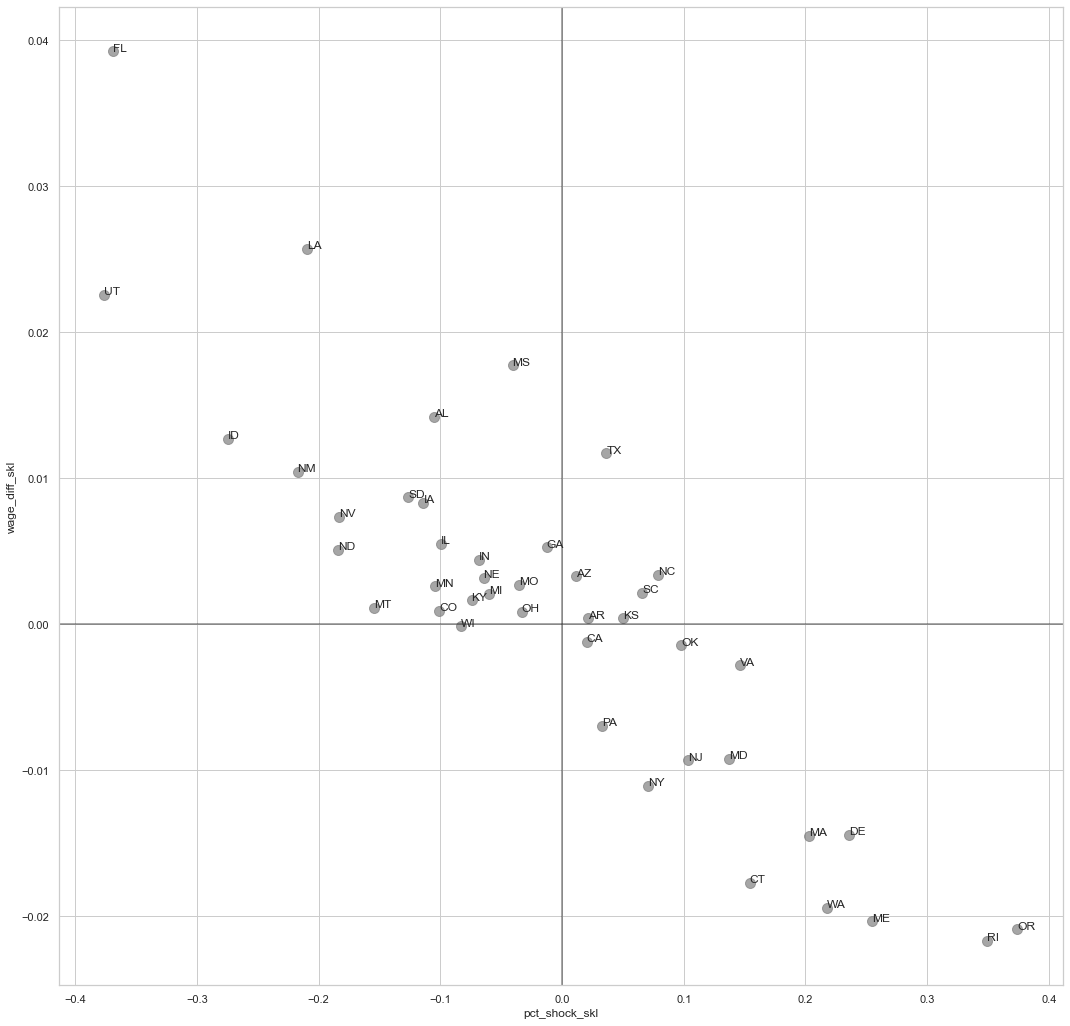

In [25]:
fig, ax = plt.subplots(1, 1,figsize=(18,18))
colors = np.where(((labor_wage_pvt["difference"]<0 )& (labor_wage_pvt["wage_diff_skl"]<0)),'#dede00','k')
colors = np.where(((labor_wage_pvt["difference"]<0 )& (labor_wage_pvt["wage_diff_skl"]>0)),'#e41a1c',colors)
colors = np.where(((labor_wage_pvt["difference"]>0 )& (labor_wage_pvt["wage_diff_skl"]>0)),'#377eb8',colors)

labor_wage_pvt.plot.scatter( 'pct_shock_skl','wage_diff_skl',ax=ax,c='grey',alpha=.7,s=100)


ax.axhline(0, linestyle='-', color='k',alpha=.5) # horizontal lines
ax.axvline(0, linestyle='-', color='k',alpha=.5) # vertical lines

for i, txt in enumerate(labor_wage_pvt.r):
    ax.annotate(txt, (labor_wage_pvt.pct_shock_skl.iat[i],labor_wage_pvt.wage_diff_skl.iat[i]),fontsize=12)
plt.show()

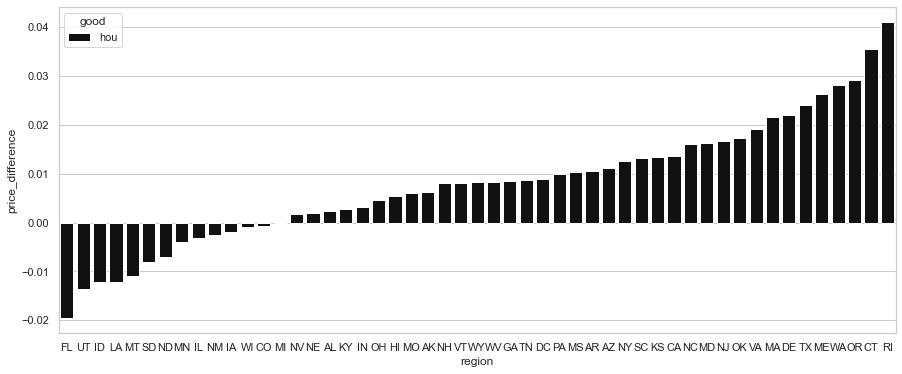

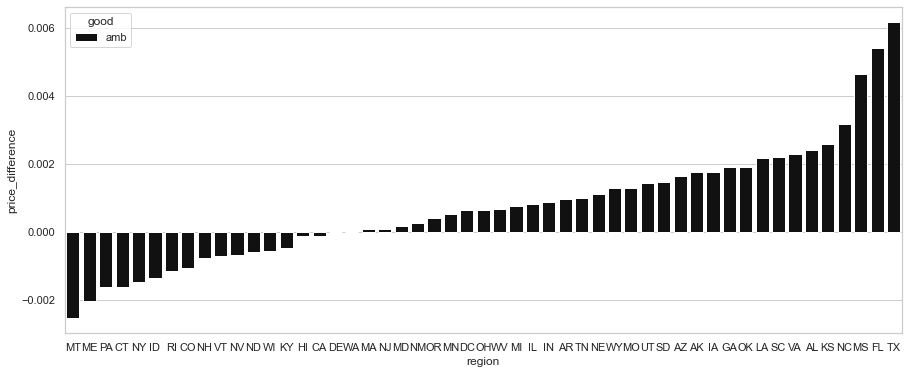

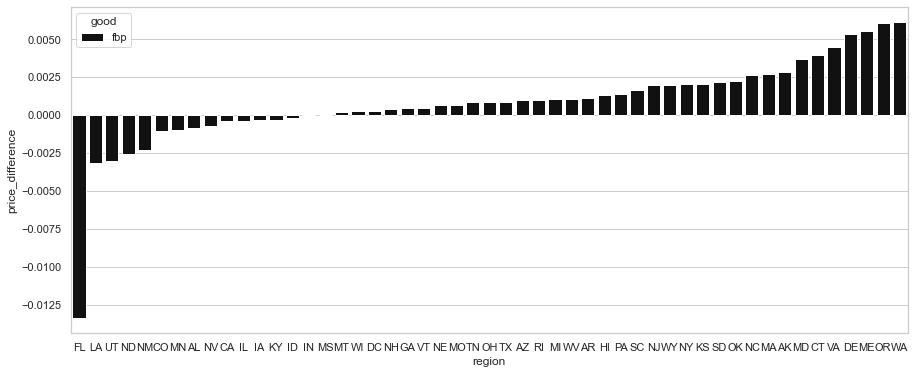

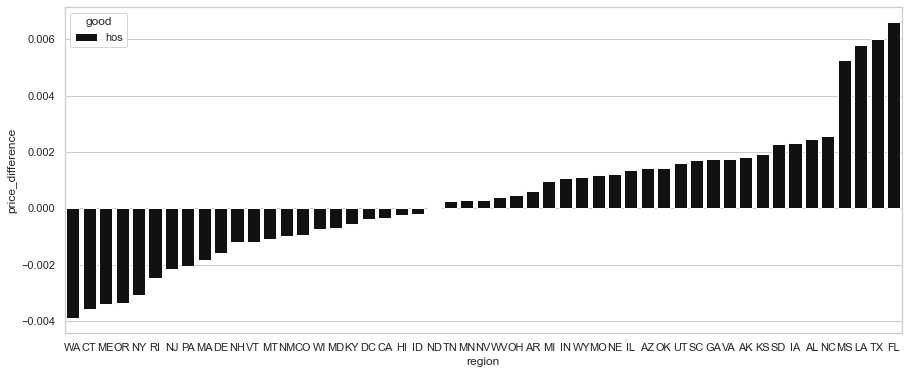

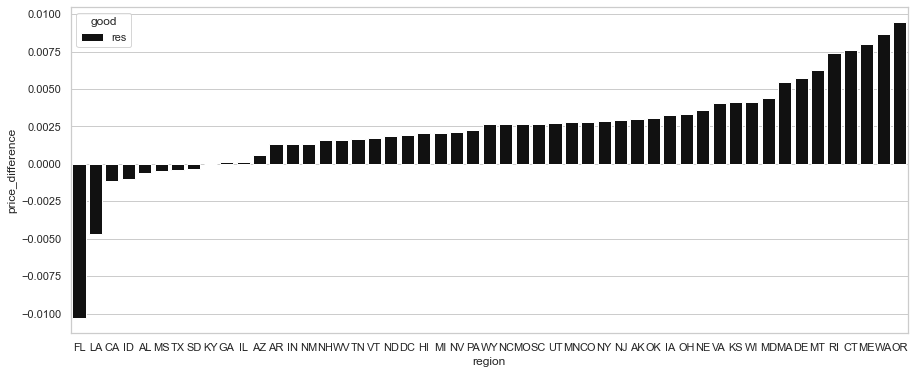

In [26]:
for g in ['hou','amb','fbp','hos','res',]:
    change_in_py=py_rpt0[py_rpt0['good']==g]
    change_in_py['price_difference']=change_in_py['py0']-1

    fig, ax = plt.subplots(1, 1,figsize=(15,6))
    change_in_py=change_in_py.sort_values(by=['price_difference'],ascending=True).reset_index()

    sns.set_theme(style="whitegrid")
    g = sns.barplot(
        data=change_in_py,
        x="region", y='price_difference',hue='good',
       palette=['#111111']
    )